In [7]:
# importing required libraries
import dowhy
from dowhy import CausalModel
import pandas as pd
import numpy as np

# With ground truth

In [30]:
data = pd.read_csv("https://raw.githubusercontent.com/AMLab-Amsterdam/CEVAE/master/datasets/IHDP/csv/ihdp_npci_1.csv",
                   header=None)
col = ["treatment", "y_factual", "y_cfactual", "mu0", "mu1", ]
for i in range(1, 26):
    col.append("x" + str(i))
data.columns = col
data = data.astype({"treatment": 'bool'}, copy=False)
data



,treatment,y_factual,y_cfactual,mu0,mu1,x1,x2,x3,x4,x5,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25
0,True,5.599916,4.318780,3.268256,6.854457,-0.528603,-0.343455,1.128554,0.161703,-0.316603,...,1,1,1,1,0,0,0,0,0,0
1,False,6.875856,7.856495,6.636059,7.562718,-1.736945,-1.802002,0.383828,2.244320,-0.629189,...,1,1,1,1,0,0,0,0,0,0
2,False,2.996273,6.633952,1.570536,6.121617,-0.807451,-0.202946,-0.360898,-0.879606,0.808706,...,1,0,1,1,0,0,0,0,0,0
3,False,1.366206,5.697239,1.244738,5.889125,0.390083,0.596582,-1.850350,-0.879606,-0.004017,...,1,0,1,1,0,0,0,0,0,0
4,False,1.963538,6.202582,1.685048,6.191994,-1.045229,-0.602710,0.011465,0.161703,0.683672,...,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,False,4.091946,6.061976,3.986826,7.053195,-0.007654,-0.202946,-0.360898,0.161703,-0.316603,...,1,0,1,0,0,0,0,0,0,0
743,True,5.501677,4.237157,4.111877,7.084080,0.727295,-0.202946,-0.733261,-0.879606,0.808706,...,1,1,1,0,0,0,0,0,0,0
744,False,1.842583,4.949537,2.346736,6.523225,1.181234,0.196818,-1.477987,0.161703,0.746189,...,1,1,1,0,0,0,0,0,0,0
745,False,3.076368,7.554212,2.114661,6.419095,-0.288664,-0.202946,-1.477987,-0.879606,1.621430,...,1,1,1,0,0,0,0,0,0,0


In [31]:
np.mean(data['mu1'] - data['mu0'])

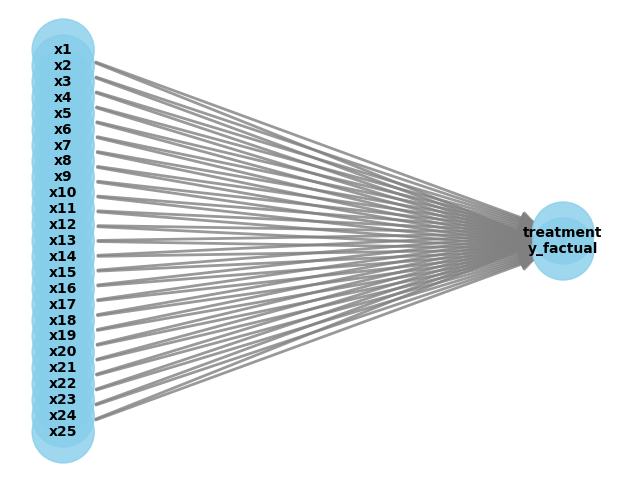

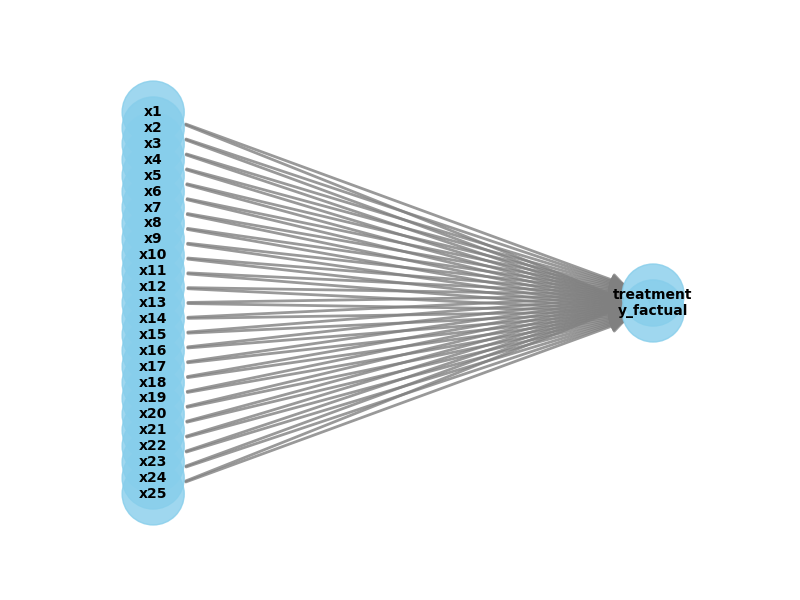

In [32]:
# Create a causal model from the data and given common causes.
model = CausalModel(
    data=data,
    treatment='treatment',
    outcome='y_factual',
    common_causes=["x" + str(i) for i in range(1, 26)]
)
model.view_model()
from IPython.display import Image, display

display(Image(filename="causal_model.png"))

In [33]:
#Identify the causal effect
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True, method_name="maximal-adjustment")
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(E[y_factual|x25,x20,x7,x18,x12,x22,x21,x6,x8,x15,x16,x14,x10,x5,x
d[treatment]                                                                  

                                       
19,x2,x23,x17,x4,x3,x9,x1,x13,x24,x11])
                                       
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→y_factual then P(y_factual|treatment,x25,x20,x7,x18,x12,x22,x21,x6,x8,x15,x16,x14,x10,x5,x19,x2,x23,x17,x4,x3,x9,x1,x13,x24,x11,U) = P(y_factual|treatment,x25,x20,x7,x18,x12,x22,x21,x6,x8,x15,x16,x14,x10,x5,x19,x2,x23,x17,x4,x3,x9,x1,x13,x24,x11)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [34]:
# Estimate the causal effect and compare it with Average Treatment Effect
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.linear_regression", test_significance=True
                                 )

print(estimate)

print("Causal Estimate is " + str(estimate.value))
data_1 = data[data["treatment"] == 1]
data_0 = data[data["treatment"] == 0]

print("ATE", np.mean(data_1["y_factual"]) - np.mean(data_0["y_factual"]))


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(E[y_factual|x25,x20,x7,x18,x12,x22,x21,x6,x8,x15,x16,x14,x10,x5,x
d[treatment]                                                                  

                                       
19,x2,x23,x17,x4,x3,x9,x1,x13,x24,x11])
                                       
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→y_factual then P(y_factual|treatment,x25,x20,x7,x18,x12,x22,x21,x6,x8,x15,x16,x14,x10,x5,x19,x2,x23,x17,x4,x3,x9,x1,x13,x24,x11,U) = P(y_factual|treatment,x25,x20,x7,x18,x12,x22,x21,x6,x8,x15,x16,x14,x10,x5,x19,x2,x23,x17,x4,x3,x9,x1,x13,x24,x11)

## Realized estimand
b: y_factual~treatment+x25+x20+x7+x18+x12+x22+x21+x6+x8+x15+x16+x14+x10+x5+x19+x2+x23+x17+x4+x3+x9+x1+x13+x24+x11
Target units: ate

## Estimate
Mean va

In [35]:
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_matching"
                                 )

print("Causal Estimate is " + str(estimate.value))

print("ATE", np.mean(data_1["y_factual"]) - np.mean(data_0["y_factual"]))


Causal Estimate is 3.9727311622191595
ATE 4.021121012430829


In [36]:
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_stratification",
                                 method_params={'num_strata': 50, 'clipping_threshold': 5}
                                 )

print("Causal Estimate is " + str(estimate.value))
print("ATE", np.mean(data_1["y_factual"]) - np.mean(data_0["y_factual"]))



Causal Estimate is 3.3625443135345345
ATE 4.021121012430829


In [37]:
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_weighting"
                                 )

print("Causal Estimate is " + str(estimate.value))

print("ATE", np.mean(data_1["y_factual"]) - np.mean(data_0["y_factual"]))


Causal Estimate is 4.028653382811941
ATE 4.021121012430829


In [16]:
refute_results = model.refute_estimate(identified_estimand, estimate,
                                       method_name="random_common_cause")
print(refute_results)

Refute: Add a random common cause
Estimated effect:4.028653382811941
New effect:4.028653382811941
p value:1.0



In [17]:
res_placebo = model.refute_estimate(identified_estimand, estimate,
                                    method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

Refute: Use a Placebo Treatment
Estimated effect:4.028653382811941
New effect:-0.43726731307635514
p value:0.0



In [18]:
res_subset = model.refute_estimate(identified_estimand, estimate,
                                   method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

Refute: Use a subset of data
Estimated effect:4.028653382811941
New effect:4.032267459978187
p value:0.94



# With partial data

In [19]:
# main_dataset= pd.read_csv("https://raw.githubusercontent.com/AMLab-Amsterdam/CEVAE/master/datasets/IHDP/csv/ihdp_npci_1.csv", header = None)
main_dataset = pd.read_csv("../../../CausalRFF/datasets/IHDP/csv/ihdp_npci_1.csv", header=None)
col = ["treatment", "y_factual", "y_cfactual", "mu0", "mu1", ]
for i in range(1, 26):
    col.append("x" + str(i))
main_dataset.columns = col
main_dataset['x14'] = main_dataset['x14'].replace({1: 0, 2: 1})

# Shuffle the dataset
main_dataset = main_dataset.sample(frac=1).reset_index(drop=True)
main_dataset

del main_dataset['y_cfactual']
del main_dataset['mu0']
del main_dataset['mu1']

main_dataset = main_dataset[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7',
                             'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17',
                             'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'treatment', 'y_factual']]

main_dataset

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x18,x19,x20,x21,x22,x23,x24,x25,treatment,y_factual
0,-1.801793,-2.201766,1.873280,-0.879606,0.246052,2.951372,1,0,1,0,...,1,0,0,0,0,0,0,0,0,9.280047
1,0.316588,0.596582,-0.733261,0.161703,-0.191569,-0.360940,1,1,0,0,...,1,0,0,0,0,0,1,0,0,3.959215
2,-0.050886,0.196818,-0.360898,0.161703,-0.129052,1.460832,0,0,1,0,...,1,0,0,0,0,0,0,1,0,4.794639
3,0.684062,0.596582,-0.360898,0.161703,-0.879258,-0.195324,0,0,1,0,...,1,1,0,0,0,0,0,0,0,2.143021
4,-0.007654,-0.202946,-0.360898,-0.879606,0.496120,1.460832,1,0,0,0,...,1,0,0,1,0,0,0,0,0,2.610829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,-0.094118,0.196818,-0.360898,-0.879606,0.621155,0.467138,1,0,1,1,...,1,0,0,0,1,0,0,0,0,3.135266
743,-0.288664,0.196818,-0.360898,0.161703,0.621155,0.467138,1,1,1,0,...,1,0,0,0,0,0,0,1,1,7.748989
744,-0.439977,-0.602710,1.128554,0.161703,-1.504430,1.129600,0,0,1,1,...,1,0,0,1,0,0,0,0,0,2.815464
745,-1.736945,-2.201766,1.873280,2.244320,-2.254636,0.798369,0,0,0,1,...,1,0,1,0,0,0,0,0,0,4.600054


In [20]:
nC = 3  # number of clients
samples_per_client = 200

data_chunks = np.array_split(main_dataset[0: nC * samples_per_client], nC)  # n chunks for n clients

In [25]:

import pickle
ate={}

for client_no in range(nC):
    print('Client ',client_no)
    
    data = data_chunks[client_no]
    model = CausalModel(
        data=data,
        treatment='treatment',
        outcome='y_factual',
        common_causes=["x" + str(i) for i in range(1, 26)]
    )

    identified_estimand = model.identify_effect(proceed_when_unidentifiable=True, method_name="maximal-adjustment")

    # Using Linear Regression
    estimate = model.estimate_effect(identified_estimand,
                                     method_name="backdoor.linear_regression", test_significance=True
                                     )
    
    print("Causal Estimate is " + str(estimate.value))
    key='Linear Regression'
    if key not in ate:
        ate[key]=[]
    ate[key].append(estimate.value)


    
    # Using Propensity Score Matching
    estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_matching")

    print("Causal Estimate is " + str(estimate.value))
    key='Propensity Score Matching'
    if key not in ate:
        ate[key]=[]
    ate[key].append(estimate.value)
    
    #Using Propensity Score Stratification
    estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification", method_params={'num_strata':10, 'clipping_threshold':5})

    print("Causal Estimate is " + str(estimate.value))
    key='Propensity Score Stratification'
    if key not in ate:
        ate[key]=[]
    ate[key].append(estimate.value)
    
    # Using Propensity Score Weighting
    estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_weighting")

    print("Causal Estimate is " + str(estimate.value))
    key='Propensity Score Weighting'
    if key not in ate:
        ate[key]=[]
    ate[key].append(estimate.value)
    
    
    # Refute 1
    refute_results=model.refute_estimate(identified_estimand, estimate,
        method_name="random_common_cause")
    print(refute_results)
    
    
    # Refute 2
    res_placebo=model.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute")
    print(res_placebo)
    
    
    # Data Subset Refute
    res_subset=model.refute_estimate(identified_estimand, estimate,
    method_name="data_subset_refuter", subset_fraction=0.9)
    print(res_subset)

Client  0
Causal Estimate is 4.229995147746564
Causal Estimate is 4.379759399318397
Causal Estimate is 4.278134906344536
Causal Estimate is 4.220820039299681
Refute: Add a random common cause
Estimated effect:4.220820039299681
New effect:4.220820039299681
p value:1.0

Refute: Use a Placebo Treatment
Estimated effect:4.220820039299681
New effect:-0.4806210799314503
p value:0.18

Refute: Use a subset of data
Estimated effect:4.220820039299681
New effect:4.217666971883236
p value:0.98

Client  1
Causal Estimate is 4.058085341247019
Causal Estimate is 3.7319551313492547
Causal Estimate is 4.214450560942981
Causal Estimate is 3.7788481270934944
Refute: Add a random common cause
Estimated effect:3.7788481270934944
New effect:3.7788481270934953
p value:1.0

Refute: Use a Placebo Treatment
Estimated effect:3.7788481270934944
New effect:-0.3897379109778841
p value:0.38

Refute: Use a subset of data
Estimated effect:3.7788481270934944
New effect:3.782153920990087
p value:0.98

Client  2
Causal E

In [26]:
for key in ate:
    # true_ate= 3.98
    # ate[key]= [abs(true_ate-ate[key][i]) for i in range(len(ate[key]))]
    print(key, np.mean(ate[key]), np.std(ate[key]))

Linear Regression 4.073638921424003 0.12181210740008655
Propensity Score Matching 4.084586639564964 0.2675677150814943
Propensity Score Stratification 4.208774418773161 0.059086353836250924
Propensity Score Weighting 4.028288762305039 0.18486715786259997
